In [2]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
iris = datasets.load_iris()

In [4]:
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [5]:
def Fisher(X1, X2, n):
    X1 = X1[:, 0:n]
    X2 = X2[:, 0:n]
    m1 = (np.mean(X1, axis=0))
    m2 = (np.mean(X2, axis=0))
    m1 = m1.reshape(n, 1)  # 将行向量转换为列向量以便于计算
    m2 = m2.reshape(n, 1)

    # 计算类内离散度矩阵
    S1 = np.zeros((n, n))  # m1 = within_class_scatter_matrix1
    S2 = np.zeros((n, n))  # m2 = within_class_scatter_matrix2
    for i in range(0, X1.shape[0]):
        S1 += (X1[i].reshape(n, 1) - m1).dot((X1[i].reshape(n, 1) - m1).T)
    for i in range(0, X2.shape[0]):
        S2 += (X2[i].reshape(n, 1) - m2).dot((X2[i].reshape(n, 1) - m2).T)
    # 计算总类内离散度矩阵S_w
    S_w = S1 + S2

    # 计算最优投影方向 W
    W = np.linalg.inv(S_w).dot(m1 - m2)
    # 在投影后的一维空间求两类的均值
    m_1 = (W.T).dot(m1)
    m_2 = (W.T).dot(m2)

    # 计算分类阈值 W0(为一个列向量)
    W0 = 0.5 * (m_1 + m_2)

    return W, W0


In [6]:
def Classify(X, W, W0, n):
    y = (W.T).dot(X[0:n, :]) - W0
    return y

In [7]:
P1 = iris.data[0:50, 0:4]
P2 = iris.data[50:100, 0:4]
P3 = iris.data[100:150, 0:4]

result = np.zeros(100)
Accuracy = np.zeros((3, 4))

In [8]:

for k in range(0,3):
    if k == 0:
        P_1 = P1
        P_2 = P2
    if k == 1:
        P_1 = P2
        P_2 = P3
    if k == 2:
        P_1 = P1
        P_2 = P3
    for n in range(1, 5):
        count = 0
        for i in range(100):
            if i <= 49:
                test = P_1[i]
                test = test.reshape(4, 1)
                train = np.delete(P_1, i, axis=0)
                W, W0 = Fisher(train, P_2, n)
                if (Classify(test, W, W0, n)) >= 0:
                    count += 1
                    result[i] = Classify(test, W, W0, n)
            else:
                test = P_2[i-50]
                test = test.reshape(4, 1)
                train = np.delete(P_2, i-50, axis=0)
                W, W0 = Fisher(P_1, train, n)
                if (Classify(test, W, W0, n)) < 0:
                    count += 1
                    result[i] = Classify(test, W, W0, n)
        Accuracy[k][n-1] = count/100
        if k == 0:
            print("第一类和第二类的分类准确率在维数取%d时为:%.3f" % (n, Accuracy[k][n-1]))
        if k == 1:
            print("第二类和第三类的分类准确率在维数取%d时为:%.3f" % (n, Accuracy[k][n-1]))
        if k == 2:
            print("第一类和第三类的分类准确率在维数取%d时为:%.3f" % (n, Accuracy[k][n-1]))


第一类和第二类的分类准确率在维数取1时为:0.890
第一类和第二类的分类准确率在维数取2时为:0.990


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18208\2943719933.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i] = Classify(test, W, W0, n)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18208\2943719933.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  result[i] = Classify(test, W, W0, n)


第一类和第二类的分类准确率在维数取3时为:1.000
第一类和第二类的分类准确率在维数取4时为:1.000
第二类和第三类的分类准确率在维数取1时为:0.730
第二类和第三类的分类准确率在维数取2时为:0.730
第二类和第三类的分类准确率在维数取3时为:0.920
第二类和第三类的分类准确率在维数取4时为:0.970
第一类和第三类的分类准确率在维数取1时为:0.930
第一类和第三类的分类准确率在维数取2时为:0.990
第一类和第三类的分类准确率在维数取3时为:1.000
第一类和第三类的分类准确率在维数取4时为:1.000


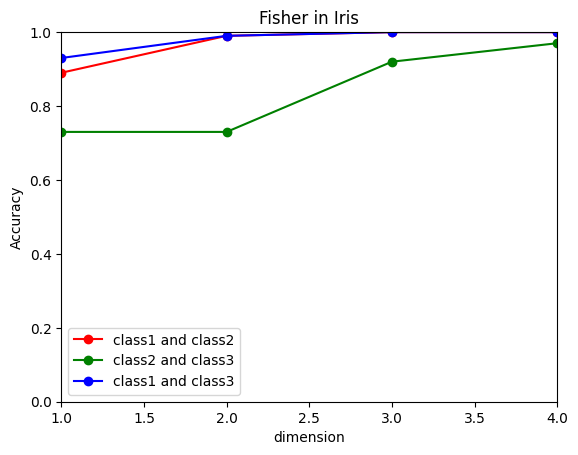

In [9]:
#画曲线图
x = np.arange(1,5,1)
plt.title("Fisher in Iris")
plt.xlabel('dimension')
plt.ylabel('Accuracy')
plt.xlim((1, 4))
plt.ylim((0, 1.0))
plt.plot(x, Accuracy[0], 'r-o', label = "class1 and class2")
plt.plot(x, Accuracy[1], 'g-o', label = "class2 and class3")
plt.plot(x, Accuracy[2], 'b-o', label = "class1 and class3")
plt.legend()
plt.savefig('Fisher in Iris')
plt.show()

In [14]:
P1.shape,W.shape

((50, 4), (4, 1))

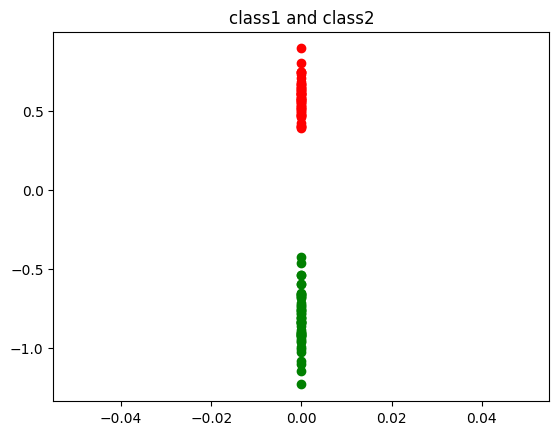

In [11]:
#class1 and class2
answer1=P1.dot(W)
answer2=P2.dot(W)
plt.title( "class1 and class2")
plt.plot(answer1.T,'r-o')
plt.plot(answer2.T,'g-o')
plt.savefig('Fisher_answer1')
plt.show()

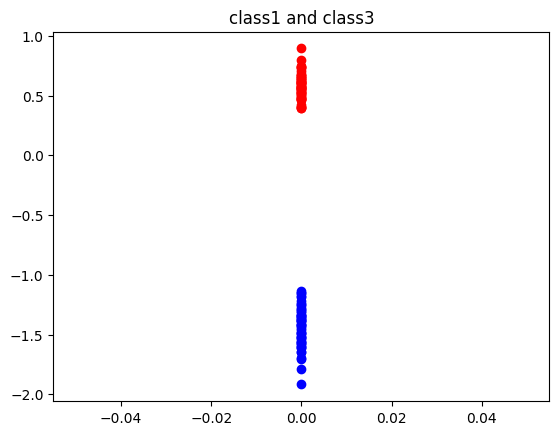

In [12]:
 #class1 and class3
answer1=P1.dot(W)
answer2=P3.dot(W)
plt.title( "class1 and class3")
plt.plot(answer1.T,'r-o')
plt.plot(answer2.T,'b-o')
plt.savefig('Fisher_answer2')
plt.show()

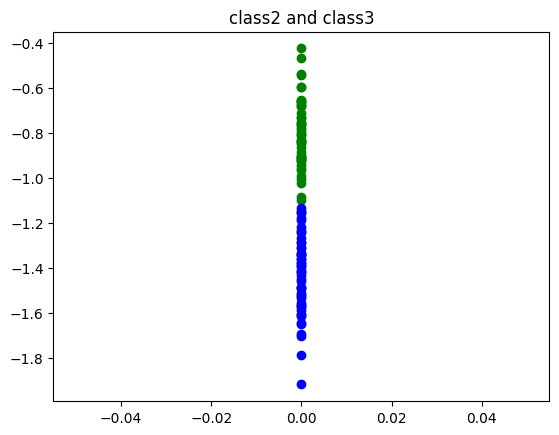

In [13]:
 #class2 and class3
answer1=P2.dot(W)
answer2=P3.dot(W)
plt.title( "class2 and class3")
plt.plot(answer1.T,'g-o')
plt.plot(answer2.T,'b-o')
plt.savefig('Fisher_answer3')
plt.show()